In [1]:
## Importing required libraries
import pandas as pd #for data preprocessing
import numpy as np #Linear Algebra

#basic tools 
import os
import warnings

#Data Visualization Libraries
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

#Import Datetime module
import datetime as dt

from sklearn.model_selection import KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV, train_test_split, cross_val_score #For splitting

#Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder,OneHotEncoder # for encoding categorical variables

#To ignore unnecessary warnings
import warnings

#tuning hyperparameters
# from bayes_opt import BayesianOptimization
# from skopt  import BayesSearchCV 


#building models
import lightgbm as lgb
import xgboost as xgb
import time
import sys

#metrics 
# import shap
warnings.simplefilter(action='ignore', category=FutureWarning)


Bad key "text.kerning_factor" on line 4 in
C:\Users\User\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


%%capture 
!pip install catboost

# Import Required Datasets (train.csv, test.csv)

In [2]:
#For Notebook Locally
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(f'The Size of the train set is: {train.shape}, and the size of test shape is : {test.shape}')

The Size of the train set is: (1568, 27), and the size of test shape is : (672, 26)


In [4]:
#Read the first 5 columns of the train set
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0


In [5]:
#Read the first 5 columns of the test shape
test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,...,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,...,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,...,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,...,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,...,12,0,200,5,1,0,0,0,0,0


In [6]:
#Create submission file using an empty/dummy dataframe
sub_file = pd.DataFrame(columns=['ID', 'Response'])
sub_file.head() 

,ID,Response


In [7]:
#Save test ID in a copy for creating submission file later
sub_file.ID = test.ID
sub_file.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [8]:
#check for missing values
train.isnull().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [9]:
test.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

We can see that train has 16 missing values in the Disposable income column and  8 in the test set

In [10]:
#Check for dtypes in train and test
train.dtypes

ID                          object
Year_of_Birth                int64
Education_Level             object
Marital_Status              object
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer               object
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
Response                     int64
dtype: object

In [11]:
test.dtypes

ID                          object
Year_of_Birth                int64
Education_Level             object
Marital_Status              object
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer               object
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
dtype: object

Aside the ID column which is just an indentifier, we have 3 categorical column(object dtype) and 23 numerical columns(excluding the target column. The targer column here is "Response" column as defined by our problem statement

In [12]:
#We can also use the .info method
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       672 non-null    object 
 1   Year_of_Birth            672 non-null    int64  
 2   Education_Level          672 non-null    object 
 3   Marital_Status           672 non-null    object 
 4   Disposable_Income        664 non-null    float64
 5   No_of_Kids_in_home       672 non-null    int64  
 6   No_of_Teen_in_home       672 non-null    int64  
 7   Date_Customer            672 non-null    object 
 8   Recency                  672 non-null    int64  
 9   Discounted_Purchases     672 non-null    int64  
 10  WebPurchases             672 non-null    int64  
 11  CatalogPurchases         672 non-null    int64  
 12  StorePurchases           672 non-null    int64  
 13  Amount_on_Wines          672 non-null    int64  
 14  Amount_on_Fruits         6

You notice we have Date columns, we have to convert that to datetime for pandas to recognise it. We'll use it for feature engineering later.
Next two steps

*   Drop ID column: We won't need it for modelling
*   Convert Datetime column



In [14]:
#Drop ID from train and test
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

In [15]:
#Convert Datetime
train['Date_Customer'] = pd.to_datetime(train['Date_Customer'])
test['Date_Customer'] = pd.to_datetime(test['Date_Customer'])

In [16]:
train.dtypes

Year_of_Birth                       int64
Education_Level                    object
Marital_Status                     object
Disposable_Income                 float64
No_of_Kids_in_home                  int64
No_of_Teen_in_home                  int64
Date_Customer              datetime64[ns]
Recency                             int64
Discounted_Purchases                int64
WebPurchases                        int64
CatalogPurchases                    int64
StorePurchases                      int64
Amount_on_Wines                     int64
Amount_on_Fruits                    int64
Amount_on_MeatProducts              int64
Amount_on_FishProducts              int64
Amount_on_SweetProducts             int64
Amount_on_GoldProds                 int64
WebVisitsMonth                      int64
Cmp3Accepted                        int64
Cmp4Accepted                        int64
Cmp5Accepted                        int64
Cmp1Accepted                        int64
Cmp2Accepted                      

In [17]:
# We can separate catgorical and numerical column
#categ_cols == categorical columns . Date column excluded
categ_cols = train.select_dtypes(include=['object', 'category']).columns

# num column == numerical columns + date column included
num_cols = [col for col in train.columns if col not in categ_cols]
print(f'The Categorical Columns are: {categ_cols}')
print(f'The Numerical Columns are: {num_cols}')

The Categorical Columns are: Index(['Education_Level', 'Marital_Status'], dtype='object')
The Numerical Columns are: ['Year_of_Birth', 'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home', 'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth', 'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted', 'Cmp2Accepted', 'Any_Complain', 'Response']


We are not going to use the numerical column now, but you might be intereted in applying some transformation methods on it later to improve your model performance

- Now let's check for unique entries in each categorical column


In [18]:

for col in categ_cols:
    print(f'Unique entries in the {col} column in the train set is: {train[col].nunique()}')
    print(f'and the unique entries are: {train[col].unique()}')

Unique entries in the Education_Level column in the train set is: 5
and the unique entries are: ['Graduation' '2n Cycle' 'Master' 'PhD' 'Basic']
Unique entries in the Marital_Status column in the train set is: 8
and the unique entries are: ['Divorced' 'Together' 'Single' 'Married' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [19]:
for col in categ_cols:
    print(f'Unique entries in the {col} column in the test set is: {test[col].nunique()}')
    print(f'and the unique entries are: {test[col].unique()}')

Unique entries in the Education_Level column in the test set is: 5
and the unique entries are: ['Graduation' 'Basic' 'Master' '2n Cycle' 'PhD']
Unique entries in the Marital_Status column in the test set is: 6
and the unique entries are: ['Single' 'Widow' 'Married' 'Together' 'Divorced' 'Absurd']


Also check unique entries in Target column

In [20]:
print(f'Unique entries in the Target column in  is: {train.Response.nunique()}')
print(f'and the unique entries are: {train.Response.unique()}')

Unique entries in the Target column in  is: 2
and the unique entries are: [0 1]


You can plot it too

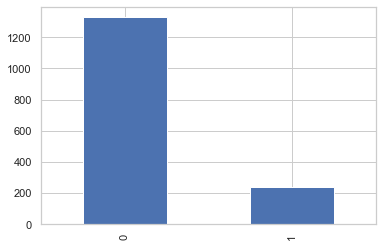

In [21]:
train.Response.value_counts().plot(kind='bar')

Take note of the difference in the number of unique entries in train and test set for the Marital column. This means we have to be careful what encoding methods we choose.

# Filling missing values
There are several methods to do this. We'll be using the mean here.



In [22]:
train['Disposable_Income'].dtype

dtype('float64')

In [23]:
train['Disposable_Income'].fillna((train['Disposable_Income'].median()) , inplace = True)
#check again to make sure
train.isnull().sum()

Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Response                   0
dtype: int64

In [24]:
test['Disposable_Income'].fillna((test['Disposable_Income'].median()) , inplace = True)
#check again to make sure
test.isnull().sum()

Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [25]:
#Read train and test again
print(f'The Size of the train set is now: {train.shape}')
train.head()

The Size of the train set is now: (1568, 26)


,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,...,6,20,3,0,0,0,0,0,0,0
1,1958,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,...,15,19,6,0,0,0,0,0,0,0
2,1962,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,...,18,37,2,0,0,0,1,0,0,1
3,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,...,24,24,8,0,0,0,0,0,0,0
4,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,...,165,203,1,0,0,0,1,0,0,0


In [26]:
print(f'The Size of the test set is now: {test.shape}')
test.head()

The Size of the test set is now: (672, 25)


,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,1954,Graduation,Single,48556.8,0,1,2013-11-01,85,6,8,...,7,23,41,8,0,0,0,0,0,0
1,1961,Graduation,Widow,57499.2,0,1,2012-11-22,79,5,7,...,0,0,75,6,0,1,0,0,0,0
2,1973,Basic,Married,17025.6,0,0,2013-02-28,47,1,2,...,16,12,27,6,0,0,0,0,0,0
3,1970,Graduation,Together,91983.6,0,0,2013-08-16,98,1,4,...,219,189,126,2,0,0,1,1,0,0
4,1959,Graduation,Together,78235.2,0,2,2013-07-25,41,2,7,...,12,0,200,5,1,0,0,0,0,0


# Encoding Categorical Variables
- Next, we're going to encode the categorical variable 
- We'll use Label Encoding to avoid mismatch of dimensionality in train and test that could be caused by dummy encoder

In [27]:
# label encoding 
le = LabelEncoder()
for i in categ_cols:
  train[i] = le.fit_transform(train[i])
  test[i] = le.fit_transform(test[i])
train.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,1955,2,2,77504.4,1,1,2014-06-22,56,2,1,...,6,20,3,0,0,0,0,0,0,0
1,1958,2,5,56784.0,0,1,2013-01-08,17,6,5,...,15,19,6,0,0,0,0,0,0,0
2,1962,2,4,103714.8,0,0,2013-11-21,17,0,7,...,18,37,2,0,0,0,1,0,0,1
3,1979,0,4,46311.6,1,0,2013-09-13,49,3,4,...,24,24,8,0,0,0,0,0,0,0
4,1959,2,3,87486.0,0,0,2014-01-21,59,1,3,...,165,203,1,0,0,0,1,0,0,0


Now we're ready to build our model

## Transform date to days from year-end of last year

In [28]:
def days_on_platform(d1):
    """
    Function to find the number of days on the platform, given a particular reference date.
    Reference date is hardcoded here for convenience and consistency.
    """
    ref = "2014-12-31" #dt.date(2014, 12, 31)
    ref = dt.datetime.strptime(ref, "%Y-%m-%d")
    d1 = dt.datetime.strptime(str(d1), "%Y-%m-%d %H:%M:%S")
    return ((ref-d1).days)

In [29]:
train["Date_Customer"] = train["Date_Customer"].apply(lambda x: days_on_platform(x))
test["Date_Customer"] = test["Date_Customer"].apply(lambda x: days_on_platform(x))
test["Date_Customer"].head()

0    425
1    769
2    671
3    502
4    524
Name: Date_Customer, dtype: int64

In [30]:
test.describe()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,...,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,1969.181548,2.413690,2.742560,63440.994643,0.406250,0.526786,533.160714,57.744048,2.400298,4.279762,...,38.363095,27.675595,44.681548,5.293155,0.072917,0.078869,0.055060,0.063988,0.014881,0.011905
std,12.116416,1.127488,1.081247,25125.530599,0.532259,0.545293,230.150559,29.321893,1.919125,2.782585,...,56.112424,42.275184,53.520249,2.328867,0.260193,0.269735,0.228266,0.244914,0.121167,0.108538
min,1894.000000,0.000000,0.000000,5313.600000,0.000000,0.000000,25.000000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,2.000000,2.000000,44376.300000,0.000000,0.000000,362.000000,33.000000,1.000000,2.000000,...,2.750000,2.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,2.000000,3.000000,64007.400000,0.000000,1.000000,527.000000,58.000000,2.000000,4.000000,...,11.000000,9.000000,24.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1978.000000,3.000000,4.000000,83207.100000,1.000000,1.000000,707.000000,84.000000,3.000000,6.000000,...,50.000000,33.250000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,4.000000,5.000000,194876.400000,2.000000,2.000000,1088.000000,106.000000,15.000000,25.000000,...,250.000000,198.000000,321.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Deal with category imbalance
still to be done

# Modeling

In [31]:
#Split into X and y
X = train.drop('Response', axis=1)
y = train.Response

In [32]:
#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Keras DNN

In [34]:
import tensorflow as tf
import keras

ImportError: cannot import name 'export_saved_model' from 'tensorflow.python.keras.saving.saved_model' (C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\saving\saved_model\__init__.py)

In [34]:
#drop Date_Customer
# X_train = X_train.drop('Date_Customer', axis=1)
# X_test = X_test.drop('Date_Customer', axis=1)
# test = test.drop('Date_Customer', axis=1)

#Creating model 
k_model=keras.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

k_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


#Training Catboost Model on train set
k_model.fit(X_train, y_train, epochs=50, batch_size=1)


#Predictiing on Test Set
# y_pred_lgb=lgb_model.predict(X_test)
test_loss, test_acc = k_model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

#Evaluating model using f1_score
print("Keras DNN F1 score on validation set is : ",f1_score(y_test,y_pred_lgb))

LightGBM F1 score on validation set is :  0.5


In [35]:
#Now Predict on Test set
lgb_preds = lgb_model.predict(test)

In [36]:
len(y_pred_lgb)

314

In [37]:


X_rus, y_rus = (application_train_ohe.drop(['SK_ID_CURR', 'TARGET'], axis=1),
                application_train_ohe['TARGET'])

NameError: name 'application_train_ohe' is not defined

In [ ]:
#Save prediction to submission file created earlier
sub_file.Response = lgb_preds
sub_file.head()

In [ ]:
#Save to Csv for submission
sub_file.to_csv('lgbm0610_median-9-7depthSTDscaler.csv', index=False)

### Prepare learning rate shrinkage

In [ ]:
def learning_rate_010_decay_power_099(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_010_decay_power_0995(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.995, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_005_decay_power_099(current_iter):
    base_learning_rate = 0.05
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

### Use test subset for early stopping criterion
This allows us to avoid overtraining and we do not need to optimize the number of trees

In [ ]:
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

### Set up Hyperparameter search
We use random search, which is more flexible and more efficient than a grid search

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [ ]:
#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=42, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [ ]:
opt_parameters = {'colsample_bytree': 0.9234, 'min_child_samples': 399, 'min_child_weight': 0.1, 'num_leaves': 13, 'reg_alpha': 2, 'reg_lambda': 5, 'subsample': 0.855}

### Tune the weights of unbalanced classes

In [ ]:
clf_sw = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_sw.set_params(**opt_parameters)

In [ ]:
gs_sample_weight = GridSearchCV(estimator=clf_sw, 
                                param_grid={'scale_pos_weight':[1,2,6,12]},
                                scoring='roc_auc',
                                cv=5,
                                refit=True,
                                verbose=True)

In [ ]:
gs_sample_weight.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs_sample_weight.best_score_, gs_sample_weight.best_params_))

In [ ]:

# #Predictiing on Test Set
y_pred_gs=gs_sample_weight.predict(X_test)

# #Evaluating model using f1_score
print("XGBoost Special F1 score on validation set is : ",f1_score(y_test,y_pred_gs))

In [ ]:
y_test.shape

In [ ]:
#Creating model 
cat_model=CatBoostClassifier(random_seed=42, cat_features=['Education_Level', 'Marital_Status'], n_estimators=500000,eval_metric='AUC',max_depth=4,learning_rate=0.1,#reg_lambda=5,#5
                              subsample=0.9,bootstrap_type='Bernoulli', leaf_estimation_iterations=10,
                    l2_leaf_reg=5, #bagging_temperature=0.85,random_strength=100,
                     use_best_model=True)

#Training Catboost Model on train set
cat_model.fit(X_train,y_train, eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)

#Predictiing on Test Set
y_pred_cat=cat_model.predict(X_test)

#Evaluating model using f1_score
print("Catboost F1 score on validation set is : ",f1_score(y_test,y_pred_cat))

In [ ]:
# from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

errcb=[]
y_pred_totcb=[]
from sklearn.model_selection import TimeSeriesSplit, GroupKFold
fold=KFold(n_splits=4, shuffle=True, random_state=100000)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostClassifier(n_estimators=500000,eval_metric='AUC',max_depth=4,learning_rate=0.1,#reg_lambda=5,#5
                              subsample=0.9,bootstrap_type='Bernoulli',#leaf_estimation_iterations=10,
                    #l2_leaf_reg=5,#bagging_temperature=0.85,random_strength=100,
                     use_best_model=True)
    #CatBoostClassifier(n_estimators=1000,eval_metric='AUC',max_depth=5,learning_rate=0.1,reg_lambda=5,#5
                              #subsample=0.9,bootstrap_type='Bernoulli',
                    #l2_leaf_reg=5,#bagging_temperature=0.85,random_strength=100,
                     #use_best_model=True)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m.predict_proba(X_test)[:, 1]
    print("err: ",roc_auc_score(y_test,preds))
    errcb.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(test)[:, 1]
    y_pred_totcb.append(p)

In [ ]:
#Now Predict on Test set
cat_preds = cat_model.predict(test)

In [ ]:
#Save prediction to submission file created earlier
sub_file.Response = cat_preds
sub_file.head()

In [ ]:
#Save to Csv for submission
sub_file.to_csv('cat0510_median-3.csv', index=False)

In [ ]:
test.shape

## Random Forest

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import mean_absolute_error


In [ ]:
test.shape

In [ ]:
X_test.columns

In [ ]:
# drop  column
X_train = X_train.drop('Date_Customer', axis=1)
X_test = X_test.drop('Date_Customer', axis=1)

forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)

#Predictiing on Test Set
y_pred_rf=forest_model.predict(X_test)

#Evaluating model using f1_score
print("Random Forest F1 score on validation set is : ",f1_score(y_test,y_pred_rf))

In [ ]:
#drop Date_Customer from test dataframe
test = test.drop('Date_Customer', axis=1)
#Now Predict on Test set
rf_preds = forest_model.predict(test)

In [ ]:
#Save prediction to submission file created earlier
sub_file.Response = rf_preds
sub_file.head()

In [ ]:
#Save to Csv for submission
sub_file.to_csv('rf0510_median-1.csv', index=False)

## XGBClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
train2 = train.drop("Date_Customer", axis=1)
test2 = test.drop("Date_Customer", axis=1)
train2.columns

In [ ]:
X = X.drop("Date_Customer", axis=1)
X.columns

In [ ]:
errcb4=[]
y_pred_totcb4=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
fold=KFold(n_splits=15)
i=1
for train2_index, test2_index in fold.split(X,y):
    X_train, X_test = X.iloc[train2_index], X.iloc[test2_index]
    y_train, y_test = y[train2_index], y[test2_index]
    m4=XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=800, silent=True, metrics='auc',colsample_bylevel=0.8, reg_alpha=0.8)
    m4.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m4.predict_proba(X_test)[:, 1]
    print("err: ",roc_auc_score(y_test,preds))
    errcb4.append(roc_auc_score(y_test,preds))
#     p4 = m4.predict_proba(test)[:, 1]
#     y_pred_totcb4.append(p4)
    
# #Training Catboost Model on train set
# cat_model.fit(X_train,y_train, eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)

# #Predictiing on Test Set
y_pred_xgb=m4.predict(X_test)

# #Evaluating model using f1_score
print("XGBoost F1 score on validation set is : ",f1_score(y_test,y_pred_xgb))

In [ ]:
#Now Predict on Test set
test = test.drop("Date_Customer", axis=1)
xgb_preds = m4.predict(test)

In [ ]:
#Save prediction to submission file created earlier
sub_file.Response = cat_preds
sub_file.head()

In [ ]:
#Save to Csv for submission
sub_file.to_csv('xgb0510_median-1.csv', index=False)

# Next Steps
- Spend some time on preprocessing, there could be other underlying relationships in the data, which could be useful for feature engineering

- Try other Algorithms

- Fine tune your model for better score

# **Good Luck**